# PG AI - Deep Learning with Tensorflow and Keras
# Assessement Project: Lending Club Loan Data Analysis

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.<br>

## Problem Statement:  
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

#### Domain: Finance

#### Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

#### Content: 

Dataset columns and definition:

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

- installment: The monthly installments owed by the borrower if the loan is funded.

- log.annual.inc: The natural log of the self-reported annual income of the borrower.

- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

- fico: The FICO credit score of the borrower.

- days.with.cr.line: The number of days the borrower has had a credit line.

- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

- linq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

- b.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).



By Edson Teixeira<br>
teixeiraedson252@gmail.com <br>
December 15th 2021

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset
loan_data = pd.read_csv('loan_data.csv')

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
#check unique values for the purpose column
loan_data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [6]:
#converting data to prepare it for an algorithm and get a better prediction
purpose = pd.get_dummies(loan_data.purpose, drop_first=True)
purpose

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [7]:
# Update the dataframe with new dummie values for purpose column
loan_data = pd.concat([loan_data,purpose],axis=1)
loan_data.shape
new_loan_data = loan_data

In [8]:
# drop purpose column since it is already converted
new_loan_data.drop('purpose',axis=1,inplace=True)
new_loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [9]:
# split the data into features and target
split1 = new_loan_data.drop('credit.policy',axis=1)
split2 = new_loan_data['credit.policy']

In [10]:
split1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   int.rate            9578 non-null   float64
 1   installment         9578 non-null   float64
 2   log.annual.inc      9578 non-null   float64
 3   dti                 9578 non-null   float64
 4   fico                9578 non-null   int64  
 5   days.with.cr.line   9578 non-null   float64
 6   revol.bal           9578 non-null   int64  
 7   revol.util          9578 non-null   float64
 8   inq.last.6mths      9578 non-null   int64  
 9   delinq.2yrs         9578 non-null   int64  
 10  pub.rec             9578 non-null   int64  
 11  not.fully.paid      9578 non-null   int64  
 12  credit_card         9578 non-null   uint8  
 13  debt_consolidation  9578 non-null   uint8  
 14  educational         9578 non-null   uint8  
 15  home_improvement    9578 non-null   uint8  
 16  major_

In [11]:
# fitting
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
gbc.fit(split1,split2)
rfc.fit(split1,split2)
print(gbc.feature_importances_)
print(rfc.feature_importances_)

[3.01289645e-03 7.62690617e-05 1.47602875e-02 5.04671095e-02
 2.94029569e-01 1.16255119e-01 7.11876851e-02 1.00091330e-02
 4.40122014e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.99176078e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[4.36590141e-02 1.53247360e-02 1.99275516e-02 5.93761797e-02
 2.29719721e-01 1.13495976e-01 7.43103496e-02 2.35408773e-02
 4.05179322e-01 2.53826266e-03 1.07464912e-03 5.43889881e-03
 1.45153337e-03 1.48946438e-03 7.89369952e-04 1.05006360e-03
 3.09658247e-04 1.32437247e-03]


<AxesSubplot:>

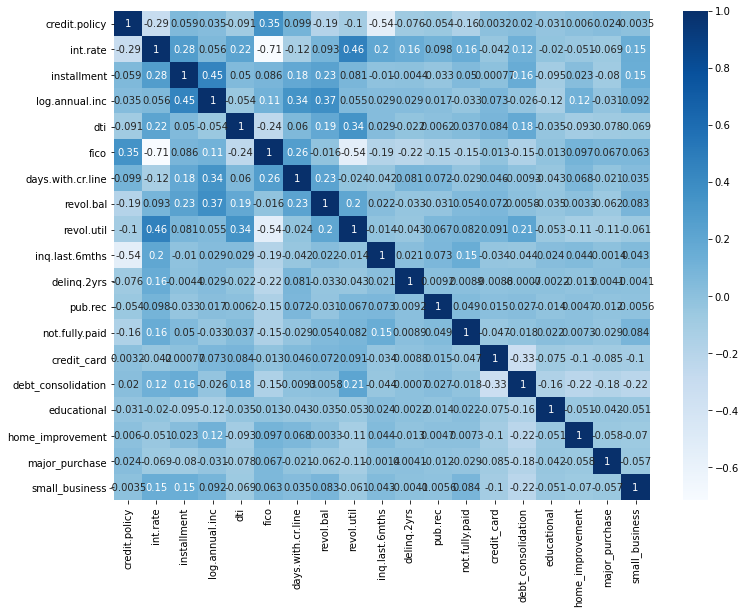

In [12]:
# plotting data correlation
plt.figure(figsize=(12,9))
sns.heatmap(new_loan_data.corr(),annot=True, cmap="Blues")

In [13]:
# splitting the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(split1,split2,test_size=0.2,random_state=1)

In [14]:
# defining the model
Loan_model = tf.keras.models.Sequential()

# input 
Loan_model.add(tf.keras.layers.Reshape((18,),input_shape=(18,)))
Loan_model.add(tf.keras.layers.BatchNormalization())

# layer #1
Loan_model.add(tf.keras.layers.Dense(128, activation='relu'))
Loan_model.add(tf.keras.layers.BatchNormalization())

# layer #1
Loan_model.add(tf.keras.layers.Dense(128, activation='relu'))
Loan_model.add(tf.keras.layers.BatchNormalization())

# layer #3
Loan_model.add(tf.keras.layers.Dense(128, activation='relu'))
Loan_model.add(tf.keras.layers.BatchNormalization())

# output layer
Loan_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [15]:
sgd_opt = tf.keras.optimizers.Adam(lr=0.0005)
Loan_model.compile(optimizer=sgd_opt,loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
Loan_model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32)

Epoch 1/100
240/240 [==============================] - 1s 4ms/step - loss: 0.4238 - accuracy: 0.8149 - val_loss: 0.3381 - val_accuracy: 0.8617
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2902 - accuracy: 0.8844 - val_loss: 0.2405 - val_accuracy: 0.9040
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2429 - accuracy: 0.8990 - val_loss: 0.1860 - val_accuracy: 0.9196
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2379 - accuracy: 0.9021 - val_loss: 0.1976 - val_accuracy: 0.9144
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2270 - accuracy: 0.9081 - val_loss: 0.1999 - val_accuracy: 0.9071
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2225 - accuracy: 0.9093 - val_loss: 0.1729 - val_accuracy: 0.9264
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.2041 - accuracy: 0.9149 - val_loss: 0.1729 - val_accuracy: 0.9280

The loan will be default using the historical data <br>
WIth the above we could reach a accuracy of 96%